In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,LinearRegression,ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("wine.csv")

In [3]:
df = data.copy()

In [4]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
le = LabelEncoder()

In [8]:
df["type"] =le.fit_transform(df["type"])

# Linear Regression

In [9]:
X = df.drop(columns="alcohol")

In [10]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,5


In [11]:
y = df["alcohol"]

In [12]:
y

0        8.8
1        9.5
2       10.1
3        9.9
4        9.9
        ... 
6492    10.5
6493    11.2
6494    11.0
6495    10.2
6496    11.0
Name: alcohol, Length: 6497, dtype: float64

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [14]:
linear = LinearRegression()

In [15]:
linear.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = linear.predict(X_test)

In [17]:
r2_score(y_test,y_pred)

0.8470402290762382

In [18]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

In [19]:
adj_r2(X,y,linear)

0.8255720140015435

Checking Linearity

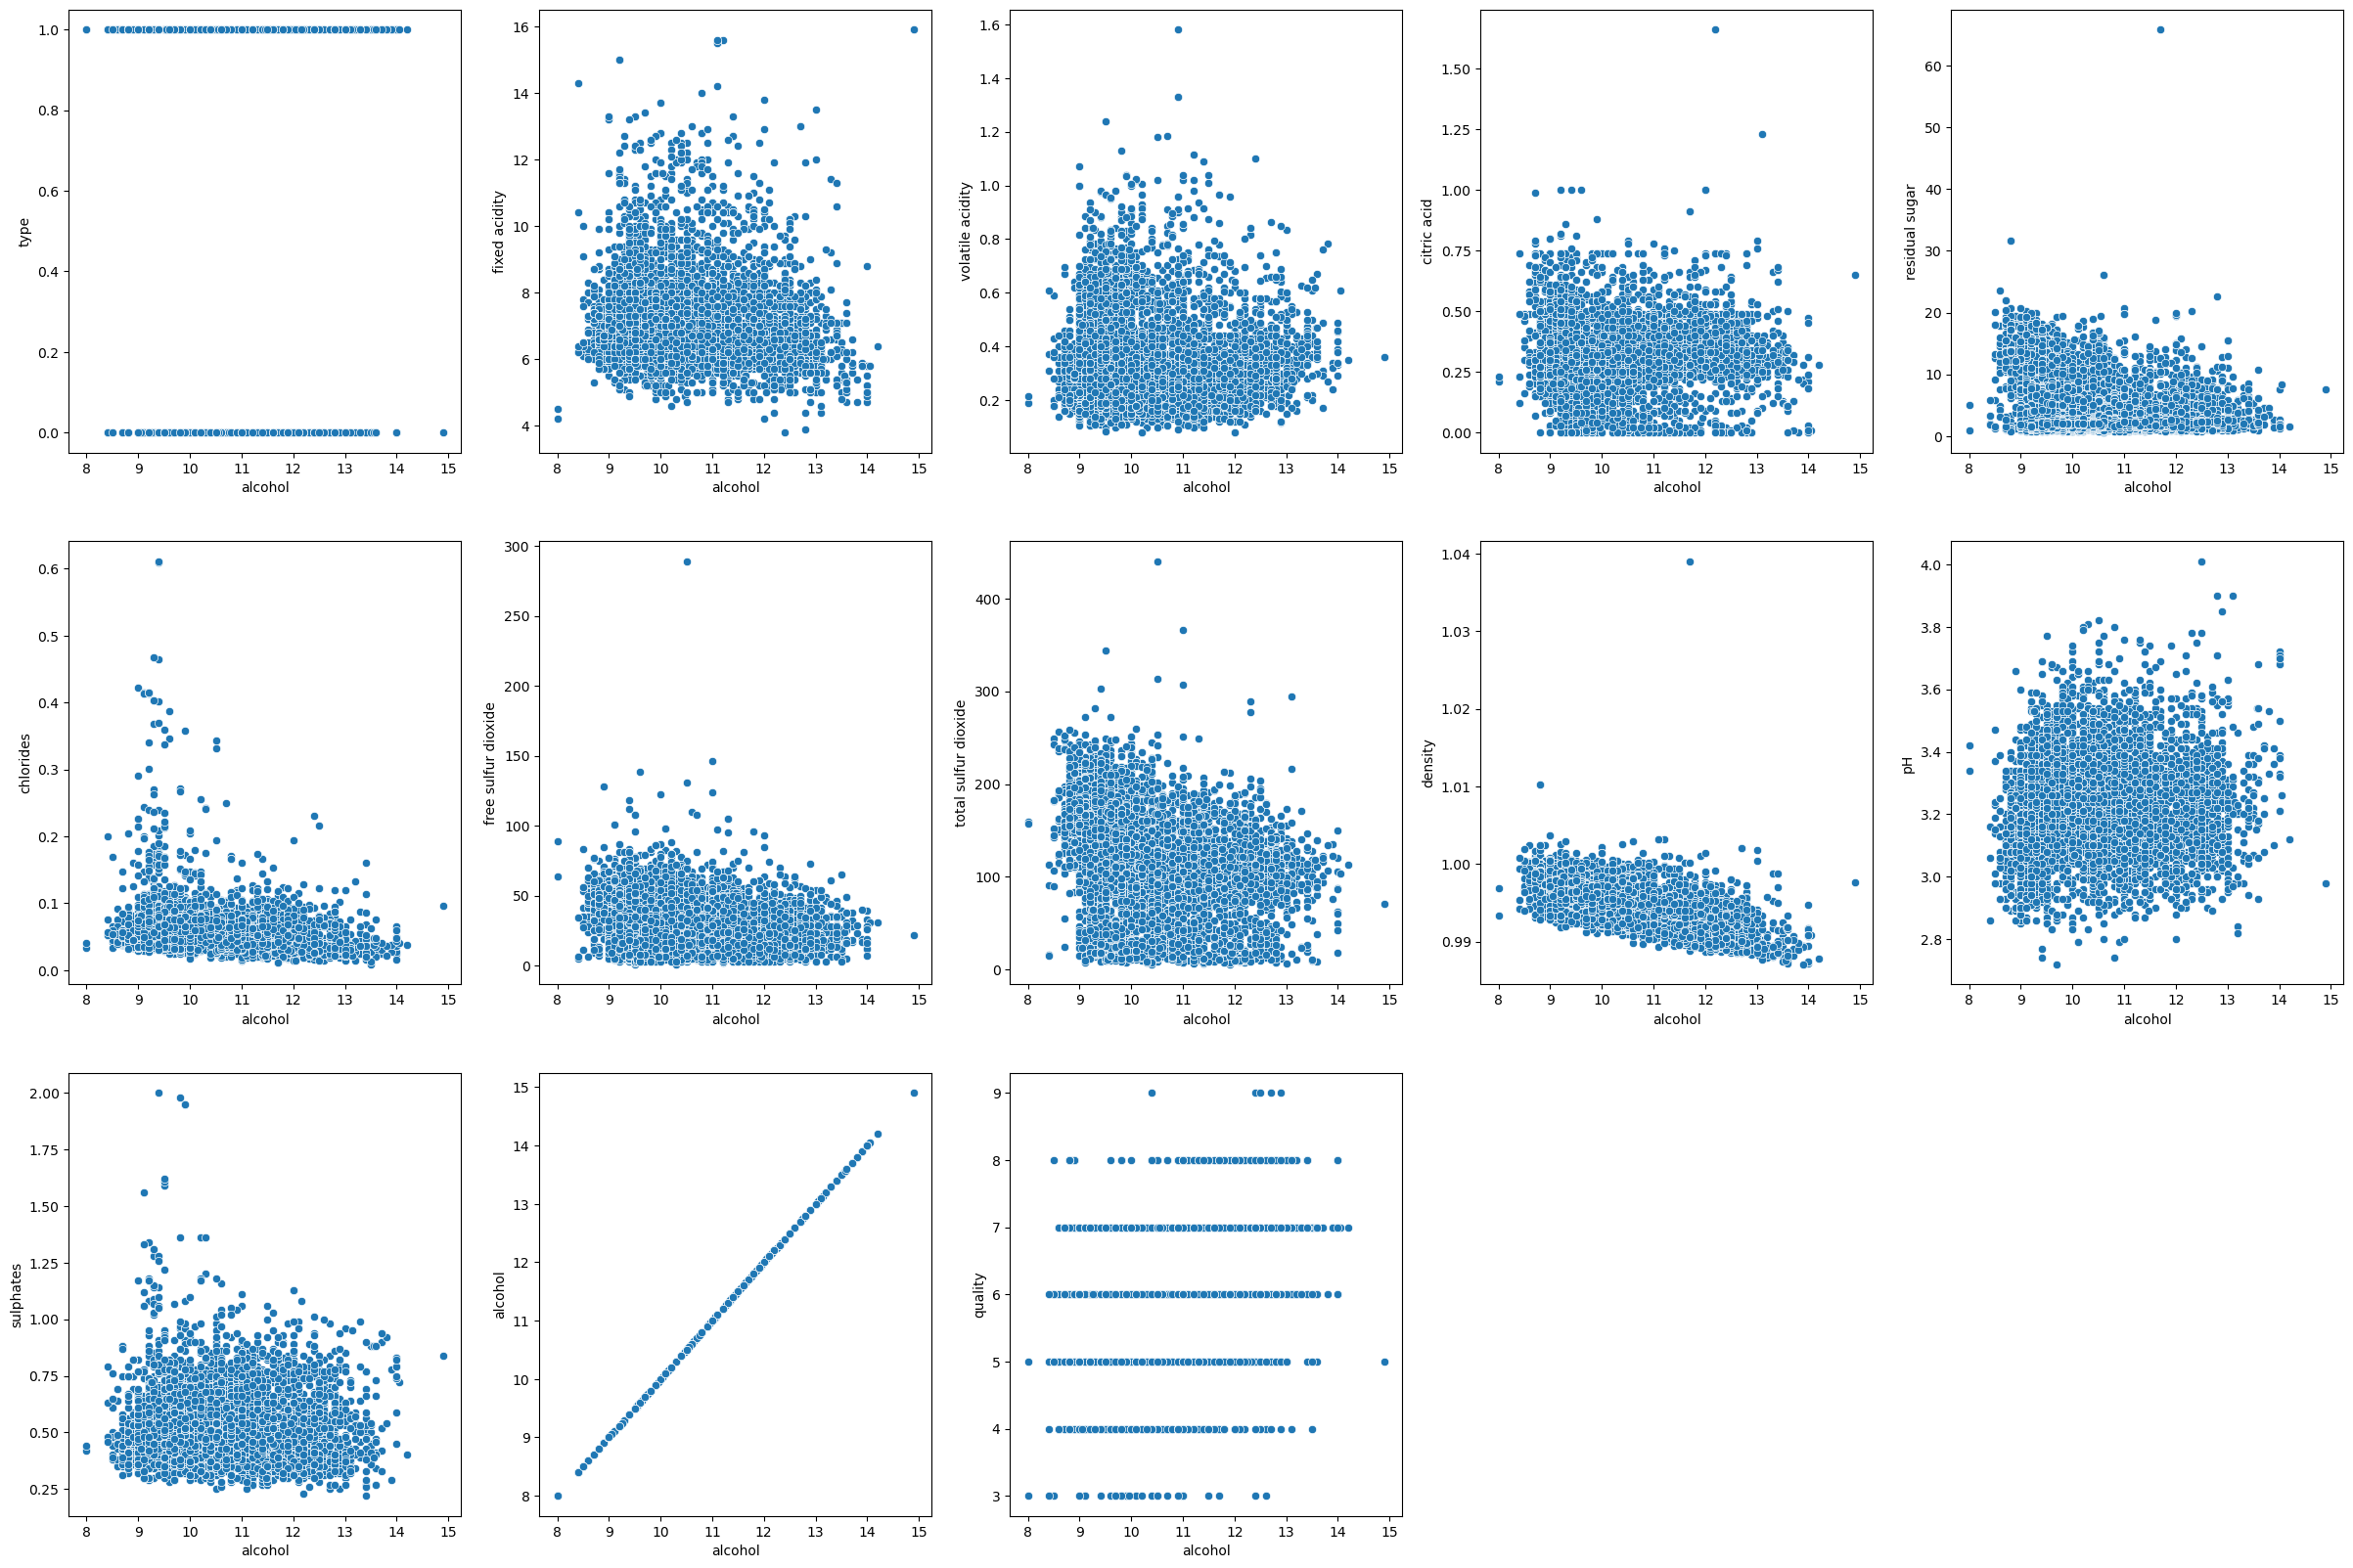

In [20]:
plt.figure(figsize=(30,20))
for i,j in enumerate(df,1):
    ax = plt.subplot(3,5,i)
    sns.scatterplot(x=df["alcohol"],y=df[j])
plt.show()

In [21]:
import statsmodels.api as sm
residual = y_pred - y_test

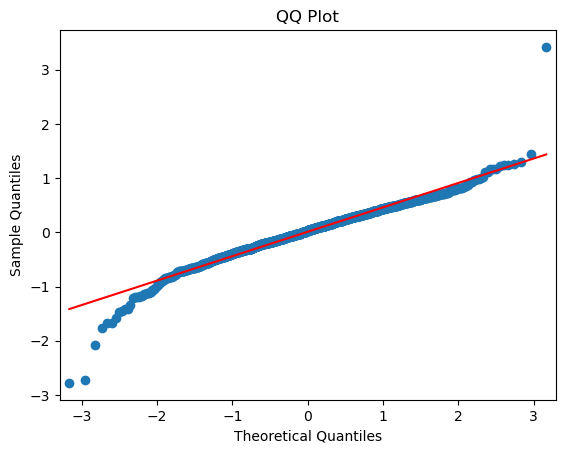

In [22]:
sm.qqplot(residual, line='r')
plt.title('QQ Plot')
plt.show()

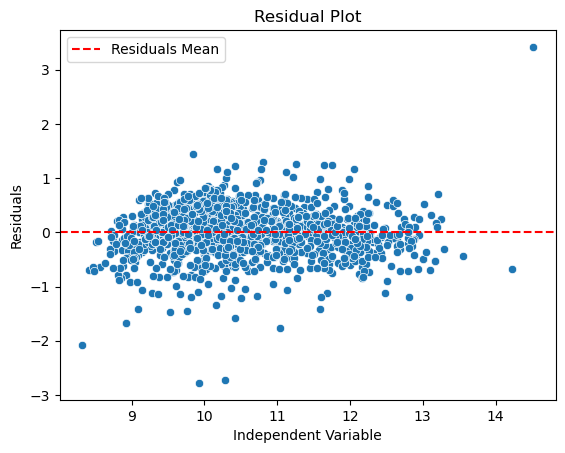

In [23]:
sns.scatterplot(x = y_pred, y=residual)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.title('Residual Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [24]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                alcohol   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          7.255e+04
Date:                Sun, 24 Dec 2023   Prob (F-statistic):                        0.00
Time:                        10:56:09   Log-Likelihood:                         -8591.8
No. Observations:                6497   AIC:                                  1.721e+04
Df Residuals:                    6485   BIC:                                  1.729e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# multicollinearity

Correlaton

In [25]:
correlation =df.corr()

<Axes: >

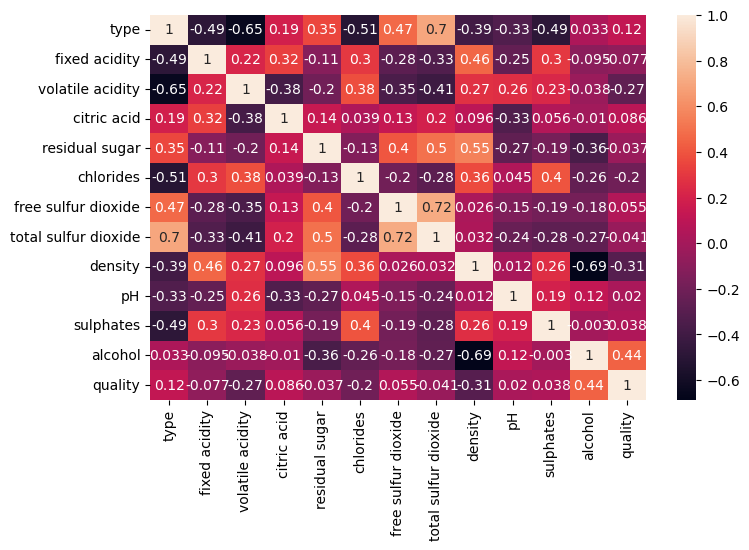

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot=True)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# Calculate VIF for the training set
vif_train = pd.DataFrame()
vif_train["Columns"] = X_train.columns
vif_train["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [29]:
# Calculate VIF for the testing set
vif_test = pd.DataFrame()
vif_test["Variable"] = X_test.columns
vif_test["VIF"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]

In [30]:
# Display VIF for the testing set
print("\nVIF for Testing Set:")
print(vif_test)


VIF for Testing Set:
                Variable          VIF
0                   type    22.594888
1          fixed acidity    71.553674
2       volatile acidity    11.926389
3            citric acid     9.730161
4         residual sugar     3.202258
5              chlorides     5.304578
6    free sulfur dioxide     7.796383
7   total sulfur dioxide    19.627112
8                density  1120.825829
9                     pH   651.917835
10             sulphates    21.495317
11               quality    51.483650


In [31]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [32]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [33]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [34]:
lin =LinearRegression()

In [35]:
sel  = EFS(lin,max_features=12, scoring="r2",cv=5)

In [36]:
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
337,1,5.8,0.270,0.27,12.3,0.045,55.0,170.0,0.99720,3.28,0.42,6
1071,1,8.3,0.220,0.38,14.8,0.054,32.0,126.0,1.00020,3.22,0.50,5
3464,1,6.9,0.290,0.41,7.8,0.046,52.0,171.0,0.99537,3.12,0.51,5
2055,1,7.3,0.290,0.29,4.6,0.029,27.0,155.0,0.99310,3.07,0.26,6
5371,0,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5910,0,7.7,1.005,0.15,2.1,0.102,11.0,32.0,0.99604,3.23,0.48,5
3915,1,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,7
1428,1,8.2,0.180,0.49,1.1,0.033,28.0,81.0,0.99230,3.00,0.68,7
4367,1,7.1,0.310,0.25,11.2,0.048,32.0,136.0,0.99663,3.14,0.40,5


In [37]:
y_train

337      9.3
1071     9.7
3464     9.6
2055    10.6
5371    10.6
        ... 
5910    10.0
3915    14.0
1428    10.4
4367     9.5
2522    10.4
Name: alcohol, Length: 5197, dtype: float64

In [ ]:
model = sel.fit(X_train,y_train)

In [ ]:
model.best_score_

In [ ]:
model.best_feature_names_

In [ ]:
model.subsets_

In [ ]:
matric_df =pd.DataFrame.from_dict(model.get_metric_dict()).T

In [ ]:
matric_df.sort_values(by=["avg_score"])

In [ ]:
rows = np.array(matric_df.sort_values(by=["avg_score"]).loc[4035]["feature_idx"])

In [ ]:
rows

In [ ]:
df1 = df.iloc[:,rows]

In [ ]:
df1

In [ ]:
le = LabelEncoder()
df1["type"] =le.fit_transform(df["type"])
X = df.drop(columns="alcohol")
y = df["alcohol"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2
adj_r2(X,y,linear)

In [ ]:
e = ElasticNet(alpha=0.5,l1_ratio=0.5)

In [ ]:
e.fit(X_train,y_train)

In [ ]:
y_prep = e.predict(X_test)

In [ ]:
r2 =r2_score(y_test,y_pred)

In [ ]:
adjusted_r2 = 1 - ((1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

In [ ]:
adjusted_r2